In [1]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import time
import seaborn as sns

# Data Loading and Exploration

## Load dataset and basic shape

In [2]:
# Load digits dataset
digits = load_digits()
X, y = digits.data, digits.target

print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {np.unique(y)}")
print(f"Feature range: [{X.min():.1f}, {X.max():.1f}]")

Dataset shape: (1797, 64)
Target shape: (1797,)
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]
Feature range: [0.0, 16.0]


## Data exploration

-----Class Distribution-----
Digit 0: 178 samples
Digit 1: 182 samples
Digit 2: 177 samples
Digit 3: 183 samples
Digit 4: 181 samples
Digit 5: 182 samples
Digit 6: 181 samples
Digit 7: 179 samples
Digit 8: 174 samples
Digit 9: 180 samples


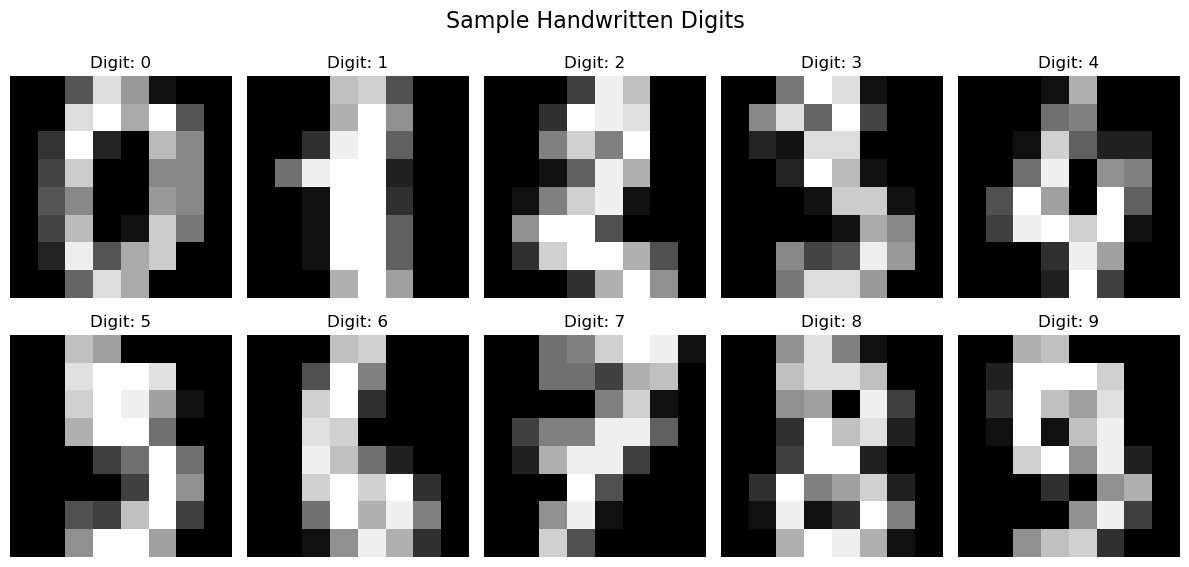

In [3]:
# Display basic statistics
print("-----Class Distribution-----")
unique, counts = np.unique(y, return_counts=True)
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")

# Visualize sample digits
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample Handwritten Digits', fontsize=16)

for i, ax in enumerate(axes.flat):
    # Display digit
    digit_image = digits.images[i]
    ax.imshow(digit_image, cmap='gray')
    ax.set_title(f'Digit: {y[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Original image shape: (8, 8)
Flattened feature vector shape: (64,)
Each 8x8 image becomes a 64-dimensional feature vector


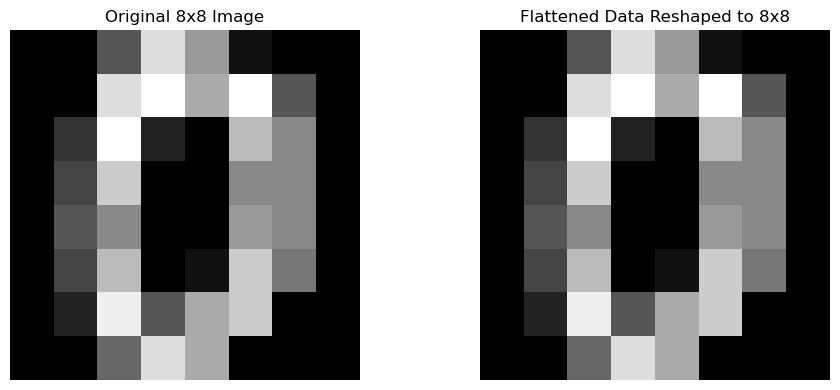


First few pixel values: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0.]
Corresponding label: 0
Total pixels per image: 64


In [4]:
# Show the relationship between flattened data and original image
# To verify that original and flattened data are identical
print(f"Original image shape: {digits.images[0].shape}")
print(f"Flattened feature vector shape: {X[0].shape}")
print(f"Each 8x8 image becomes a 64-dimensional feature vector")

# Display one digit in both formats
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Original 8x8 image
ax1.imshow(digits.images[0], cmap='gray')
ax1.set_title('Original 8x8 Image')
ax1.axis('off')

# Flattened representation as heatmap
# Heatmap should look identical to orginal image
ax2.imshow(X[0].reshape(8, 8), cmap='gray')
ax2.set_title('Flattened Data Reshaped to 8x8')
ax2.axis('off')

plt.tight_layout()
plt.show()

print(f"\nFirst few pixel values: {X[0][:10]}")
print(f"Corresponding label: {y[0]}")
print(f"Total pixels per image: {len(X[0])}")

# kNN Implementation (from scratch)

## kNN classifier

In [5]:
# Euclidean distance is the main distance metric
def euclidean_distance(point1, point2):
    """
    Calculate Euclidean distance between two points
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [6]:
# kNN classifier implemented from scratch
# Returns predicted labels for test set

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    
    for test_point in X_test:
        # Calculate distances to all training points using vectorized operations
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        
        # Get indices of k nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]
        
        # Get labels of k nearest neighbors
        k_nearest_labels = y_train[k_nearest_indices]
        
        # Find most common label, i.e. majority vote
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        prediction = unique_labels[np.argmax(counts)]
        predictions.append(prediction)
    
    return np.array(predictions)
    
# Calculate accuracy score for kNN classifier
def knn_score(X_train, y_train, X_test, y_test, k=3):
    predictions = knn_predict(X_train, y_train, X_test, k)
    accuracy = np.mean(predictions == y_test)
    return accuracy


## Basic testing 

In [7]:
# Test the kNN implementation
# Create small train/test split from digits data for initial testing
X_test_train, X_test_test, y_test_train, y_test_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Use subset for quick testing
X_tiny_train = X_test_train[:200]
y_tiny_train = y_test_train[:200]
X_tiny_test = X_test_test[:50]
y_tiny_test = y_test_test[:50]

print(f"Testing with {len(X_tiny_train)} training samples and {len(X_tiny_test)} test samples")

# Test with k=3
start_time = time.time()
test_predictions = knn_predict(X_tiny_train, y_tiny_train, X_tiny_test, k=3)
end_time = time.time()

test_accuracy = np.mean(test_predictions == y_tiny_test)
print(f"\nkNN (k=3) Results:")
print(f"Accuracy: {test_accuracy:.3f}")
print(f"Time taken: {end_time - start_time:.4f} seconds")
print(f"Sample predictions: {test_predictions[:10]}")
print(f"Actual labels: {y_tiny_test[:10]}")

# Test different k values
print(f"\n-----Testing different k values-----")
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    accuracy = knn_score(X_tiny_train, y_tiny_train, X_tiny_test, y_tiny_test, k)
    print(f"k={k}: Accuracy = {accuracy:.3f}")

Testing with 200 training samples and 50 test samples

kNN (k=3) Results:
Accuracy: 0.940
Time taken: 0.0020 seconds
Sample predictions: [5 2 8 1 7 2 6 2 6 5]
Actual labels: [5 2 8 1 7 2 6 2 6 5]

-----Testing different k values-----
k=1: Accuracy = 0.940
k=3: Accuracy = 0.940
k=5: Accuracy = 0.920
k=7: Accuracy = 0.860
k=9: Accuracy = 0.840


# Decision Trees 

## Model Implementation

In [8]:
# Trains and return fitted DT classifier
# Set random state to replicate predicitons
def train_decision_tree(X_train, y_train, max_depth=None, random_state=42):
    dt_classifier = DecisionTreeClassifier(
        max_depth=max_depth,
        random_state=random_state,
    )
    
    dt_classifier.fit(X_train, y_train)
    return dt_classifier
    
# Make predictions and calculates DT accuracy score
def dt_predict_and_score(model, X_test, y_test):
    """
    Make predictions and calculate accuracy
    """
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return predictions, accuracy

## Basic Testing

In [9]:
# Test Decision Tree implementation
print("-----Testing Decision Tree Implementation-----")

# Use the same test data from kNN section for consistency
X_dt_train = X_tiny_train  # From previous section
y_dt_train = y_tiny_train
X_dt_test = X_tiny_test
y_dt_test = y_tiny_test

print(f"Training Decision Tree with {len(X_dt_train)} samples")

# Train default Decision Tree (no max_depth limit)
print(f"\n--- Default Decision Tree (unlimited depth) ---")
start_time = time.time()
dt_default = train_decision_tree(X_dt_train, y_dt_train)
train_time = time.time() - start_time

start_time = time.time()
dt_predictions, dt_accuracy = dt_predict_and_score(dt_default, X_dt_test, y_dt_test)
predict_time = time.time() - start_time

print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {predict_time:.4f} seconds")
print(f"Tree depth: {dt_default.get_depth()}")
print(f"Number of leaves: {dt_default.get_n_leaves()}")
print(f"Accuracy: {dt_accuracy:.3f}")
print(f"Sample predictions: {dt_predictions[:10]}")
print(f"Actual labels:      {y_dt_test[:10]}")

# Test different max_depth values
print(f"\n-----Testing Different max_depth Values-----")
depth_values = [3, 5, 7, 10, None]

for depth in depth_values:
    dt_model = train_decision_tree(X_dt_train, y_dt_train, max_depth=depth)
    _, accuracy = dt_predict_and_score(dt_model, X_dt_test, y_dt_test)
    
    if depth is None:
        print(f"max_depth=None (unlimited): Accuracy = {accuracy:.3f}, Tree depth = {dt_model.get_depth()}")
    else:
        print(f"max_depth={depth}: Accuracy = {accuracy:.3f}, Tree depth = {dt_model.get_depth()}")

-----Testing Decision Tree Implementation-----
Training Decision Tree with 200 samples

--- Default Decision Tree (unlimited depth) ---
Training time: 0.0043 seconds
Prediction time: 0.0010 seconds
Tree depth: 10
Number of leaves: 43
Accuracy: 0.580
Sample predictions: [4 2 8 9 7 1 6 2 6 5]
Actual labels:      [5 2 8 1 7 2 6 2 6 5]

-----Testing Different max_depth Values-----
max_depth=3: Accuracy = 0.200, Tree depth = 3
max_depth=5: Accuracy = 0.360, Tree depth = 5
max_depth=7: Accuracy = 0.620, Tree depth = 7
max_depth=10: Accuracy = 0.580, Tree depth = 10
max_depth=None (unlimited): Accuracy = 0.580, Tree depth = 10


# Experimental Methodology

## Data splitting

In [10]:
# Data splitting (80/20 train/test, then 75/25 train/validation from training data)
# First split: 80% train, 20% test
X_train_full, X_test_final, y_train_full, y_test_final = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: From training data, create 75% train, 25% validation 
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)

print(f"Data split summary:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_validation.shape[0]} samples ({X_validation.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test_final.shape[0]} samples ({X_test_final.shape[0]/len(X)*100:.1f}%)")
print(f"Total: {len(X)} samples")

# Check class distribution
print(f"\nClass distribution:")
print(f"Original: {np.bincount(y)}")
print(f"Training: {np.bincount(y_train)}")
print(f"Validation: {np.bincount(y_validation)}")
print(f"Test: {np.bincount(y_test_final)}")

Data split summary:
Training set: 1077 samples (59.9%)
Validation set: 360 samples (20.0%)
Test set: 360 samples (20.0%)
Total: 1797 samples

Class distribution:
Original: [178 182 177 183 181 182 181 179 174 180]
Training: [106 109 107 109 109 109 109 107 104 108]
Validation: [36 37 35 37 36 36 36 36 35 36]
Test: [36 36 35 37 36 37 36 36 35 36]


## Hyperparameter tuning

In [11]:
# Hyperparameter tuning setup
# Evaluate kNN classifier with specific k value
def evaluate_knn_k(k_value):
    predictions = knn_predict(X_train, y_train, X_validation, k=k_value)
    accuracy = np.mean(predictions == y_validation)
    return accuracy
    
# Evaluate DT classifier with specific max depth value
def evaluate_dt_depth(depth_value):
    dt_model = train_decision_tree(X_train, y_train, max_depth=depth_value)
    _, accuracy = dt_predict_and_score(dt_model, X_validation, y_validation)
    return accuracy

### Test k values for kNN

In [12]:
# Test different k values for kNN
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
knn_validation_scores = []

for k in k_values:
    score = evaluate_knn_k(k)
    knn_validation_scores.append(score)
    print(f"  k={k}: Validation accuracy = {score:.3f}")

# Find best k
best_k_idx = np.argmax(knn_validation_scores)
best_k = k_values[best_k_idx]
best_knn_score = knn_validation_scores[best_k_idx]
print(f"Best k for kNN: {best_k} (accuracy = {best_knn_score:.3f})")

  k=1: Validation accuracy = 0.989
  k=3: Validation accuracy = 0.981
  k=5: Validation accuracy = 0.981
  k=7: Validation accuracy = 0.981
  k=9: Validation accuracy = 0.975
  k=11: Validation accuracy = 0.972
  k=13: Validation accuracy = 0.972
  k=15: Validation accuracy = 0.967
Best k for kNN: 1 (accuracy = 0.989)


### Test max depth values for Decision Tree

In [13]:
# Test different max_depth values for Decision Tree
depth_values = [3, 5, 7, 10, 15, 20, None]
dt_validation_scores = []

for depth in depth_values:
    score = evaluate_dt_depth(depth)
    dt_validation_scores.append(score)
    depth_str = "None" if depth is None else str(depth)
    print(f"  max_depth={depth_str}: Validation accuracy = {score:.3f}")

# Find best depth
best_depth_idx = np.argmax(dt_validation_scores)
best_depth = depth_values[best_depth_idx]
best_dt_score = dt_validation_scores[best_depth_idx]
depth_str = "None" if best_depth is None else str(best_depth)
print(f"Best max_depth for Decision Tree: {depth_str} (accuracy = {best_dt_score:.3f})")

  max_depth=3: Validation accuracy = 0.489
  max_depth=5: Validation accuracy = 0.667
  max_depth=7: Validation accuracy = 0.800
  max_depth=10: Validation accuracy = 0.839
  max_depth=15: Validation accuracy = 0.833
  max_depth=20: Validation accuracy = 0.833
  max_depth=None: Validation accuracy = 0.833
Best max_depth for Decision Tree: 10 (accuracy = 0.839)


### Visualising hyperparameter performance

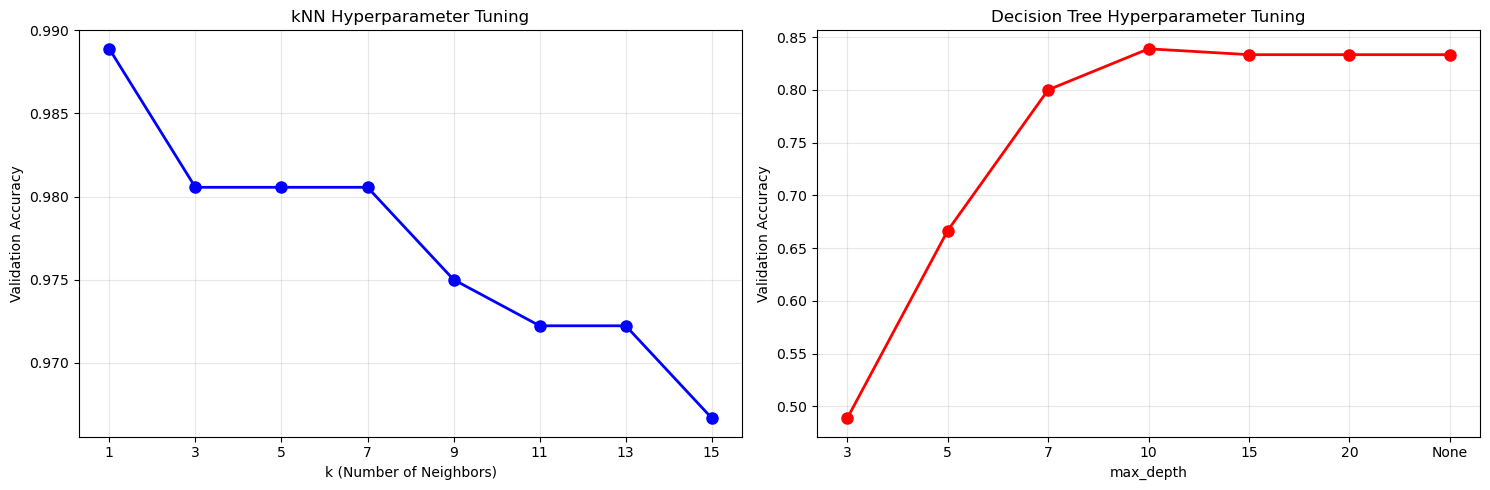

In [14]:
# Visualize hyperparameter tuning results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# kNN k values plot
ax1.plot(k_values, knn_validation_scores, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('k (Number of Neighbors)')
ax1.set_ylabel('Validation Accuracy')
ax1.set_title('kNN Hyperparameter Tuning')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_values)

# Decision Tree max_depth plot
depth_labels = [str(d) if d is not None else 'None' for d in depth_values]
ax2.plot(range(len(depth_values)), dt_validation_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('max_depth')
ax2.set_ylabel('Validation Accuracy')
ax2.set_title('Decision Tree Hyperparameter Tuning')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(len(depth_values)))
ax2.set_xticklabels(depth_labels)

plt.tight_layout()
plt.show()

# Results and Analysis

## Performance evaluation

In [15]:
print("Final Performance Evaluation on Test Set")
print(f"Using best hyperparameters:")
print(f"kNN: k = {best_k}")
print(f"Decision Tree: max_depth = {depth_str}")
print(f"Test set size: {len(X_test_final)} samples")

Final Performance Evaluation on Test Set
Using best hyperparameters:
kNN: k = 1
Decision Tree: max_depth = 10
Test set size: 360 samples


### kNN Performance Evaluation

In [16]:
# kNN Evaluation
start_time = time.time()
knn_test_predictions = knn_predict(X_train_full, y_train_full, X_test_final, k=best_k)
knn_prediction_time = time.time() - start_time

# Calculate kNN metrics
knn_accuracy = accuracy_score(y_test_final, knn_test_predictions)
knn_precision = precision_score(y_test_final, knn_test_predictions, average='weighted')
knn_recall = recall_score(y_test_final, knn_test_predictions, average='weighted')
knn_f1 = f1_score(y_test_final, knn_test_predictions, average='weighted')

print(f"Accuracy:   {knn_accuracy:.4f}")
print(f"Precision:  {knn_precision:.4f}")
print(f"Recall:     {knn_recall:.4f}")
print(f"F1-Score:   {knn_f1:.4f}")
print(f"Prediction Time: {knn_prediction_time:.4f} seconds")

Accuracy:   0.9861
Precision:  0.9867
Recall:     0.9861
F1-Score:   0.9861
Prediction Time: 0.0971 seconds


### Decision Tree Performance Evaluation

In [17]:
# Train final Decision Tree model with best parameters
final_dt_model = train_decision_tree(X_train_full, y_train_full, max_depth=best_depth)
print(f" Tree depth: {final_dt_model.get_depth()}")
print(f" Number of leaves: {final_dt_model.get_n_leaves()}")

# Decision Tree Evaluation
start_time = time.time()
dt_test_predictions = final_dt_model.predict(X_test_final)
dt_prediction_time = time.time() - start_time

# Calculate Decision Tree metrics
dt_accuracy = accuracy_score(y_test_final, dt_test_predictions)
dt_precision = precision_score(y_test_final, dt_test_predictions, average='weighted')
dt_recall = recall_score(y_test_final, dt_test_predictions, average='weighted')
dt_f1 = f1_score(y_test_final, dt_test_predictions, average='weighted')

print(f"Decision Tree Results:")
print(f"Accuracy:   {dt_accuracy:.4f}")
print(f"Precision:  {dt_precision:.4f}")
print(f"Recall:     {dt_recall:.4f}")
print(f"F1-Score:   {dt_f1:.4f}")
print(f"Prediction Time: {dt_prediction_time:.4f} seconds")

 Tree depth: 10
 Number of leaves: 123
Decision Tree Results:
Accuracy:   0.8111
Precision:  0.8147
Recall:     0.8111
F1-Score:   0.8119
Prediction Time: 0.0010 seconds


In [18]:
# Performance Comparison 
print(f"Performance Comparison")
metrics_comparison = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Prediction Time (s)'],
    'kNN': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_prediction_time],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1, dt_prediction_time]
}

print(f"{'Metric':<20} {'kNN':<12} {'Decision Tree':<15}")
print("-" * 50)
for i, metric in enumerate(metrics_comparison['Metric']):
    knn_val = metrics_comparison['kNN'][i]
    dt_val = metrics_comparison['Decision Tree'][i]
    print(f"{metric:<20} {knn_val:<12.4f} {dt_val:<15.4f}")

Performance Comparison
Metric               kNN          Decision Tree  
--------------------------------------------------
Accuracy             0.9861       0.8111         
Precision            0.9867       0.8147         
Recall               0.9861       0.8111         
F1-Score             0.9861       0.8119         
Prediction Time (s)  0.0971       0.0010         


In [19]:
# Detailed Classification Reports
print(f"\n-----kNN Classification Report-----")
print(classification_report(y_test_final, knn_test_predictions, 
                          target_names=[f'Digit {i}' for i in range(10)]))

print(f"\n-----Decision Tree Classification Report-----")
print(classification_report(y_test_final, dt_test_predictions, 
                          target_names=[f'Digit {i}' for i in range(10)]))



-----kNN Classification Report-----
              precision    recall  f1-score   support

     Digit 0       1.00      1.00      1.00        36
     Digit 1       0.92      1.00      0.96        36
     Digit 2       1.00      1.00      1.00        35
     Digit 3       1.00      1.00      1.00        37
     Digit 4       0.97      1.00      0.99        36
     Digit 5       1.00      1.00      1.00        37
     Digit 6       1.00      1.00      1.00        36
     Digit 7       1.00      1.00      1.00        36
     Digit 8       0.97      0.91      0.94        35
     Digit 9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


-----Decision Tree Classification Report-----
              precision    recall  f1-score   support

     Digit 0       0.94      0.94      0.94        36
     Digit 1       0.66      0.69      0.68     

## Confusion Matrices

In [20]:
# Generate confusion matrices
knn_cm = confusion_matrix(y_test_final, knn_test_predictions)
dt_cm = confusion_matrix(y_test_final, dt_test_predictions)

print(f"\n-----kNN Confusion Matrix-----")
print(knn_cm)

print(f"\n-----Decision Tree Confusion Matrix-----")
print(dt_cm)


-----kNN Confusion Matrix-----
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  1  0  0  0  1 34]]

-----Decision Tree Confusion Matrix-----
[[34  1  0  0  0  0  0  0  1  0]
 [ 0 25  1  2  1  0  1  2  4  0]
 [ 1  0 28  2  0  1  2  0  1  0]
 [ 0  0  0 30  0  0  1  1  2  3]
 [ 1  1  0  1 30  0  1  0  2  0]
 [ 0  0  0  0  1 35  0  0  0  1]
 [ 0  2  0  0  1  3 30  0  0  0]
 [ 0  1  1  0  2  0  0 30  0  2]
 [ 0  7  0  0  0  1  0  2 24  1]
 [ 0  1  0  3  0  0  0  2  4 26]]


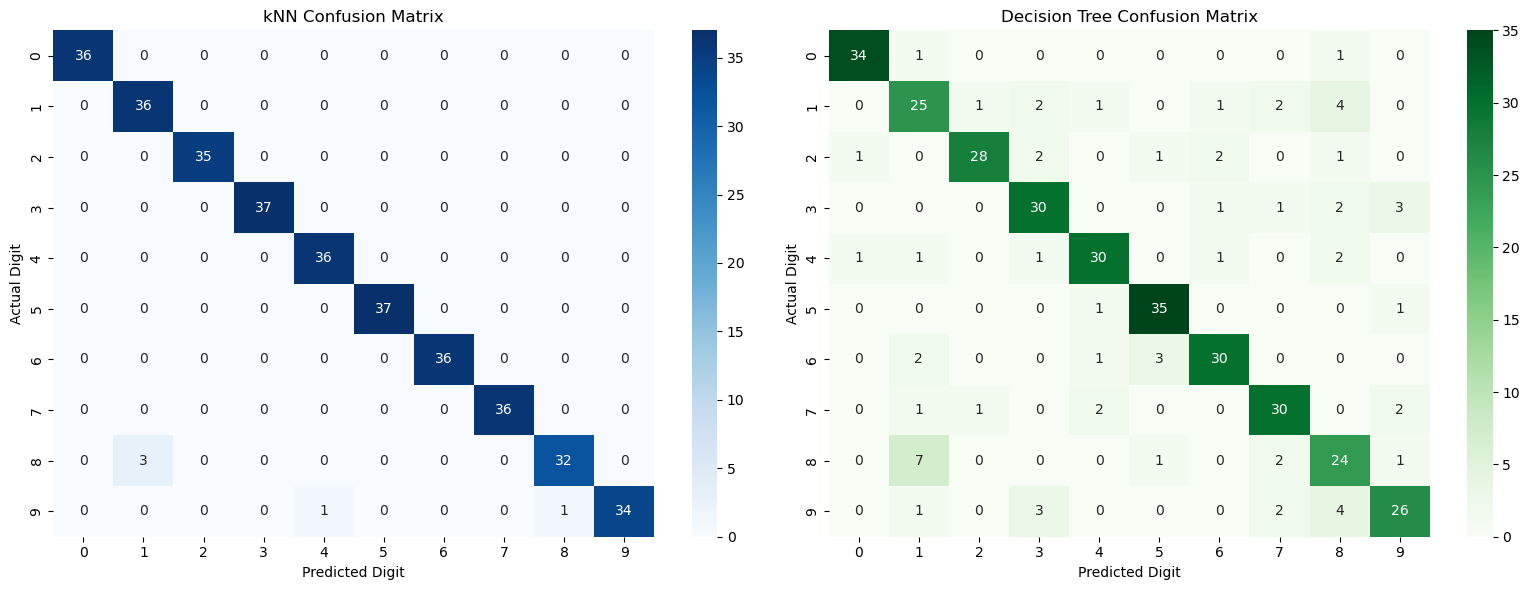

In [21]:
# Visualize confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# kNN confusion matrix heatmap
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10), ax=ax1)
ax1.set_title('kNN Confusion Matrix')
ax1.set_xlabel('Predicted Digit')
ax1.set_ylabel('Actual Digit')

# Decision Tree confusion matrix heatmap
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=range(10), yticklabels=range(10), ax=ax2)
ax2.set_title('Decision Tree Confusion Matrix')
ax2.set_xlabel('Predicted Digit')
ax2.set_ylabel('Actual Digit')

plt.tight_layout()
plt.show()

## Results visualisation

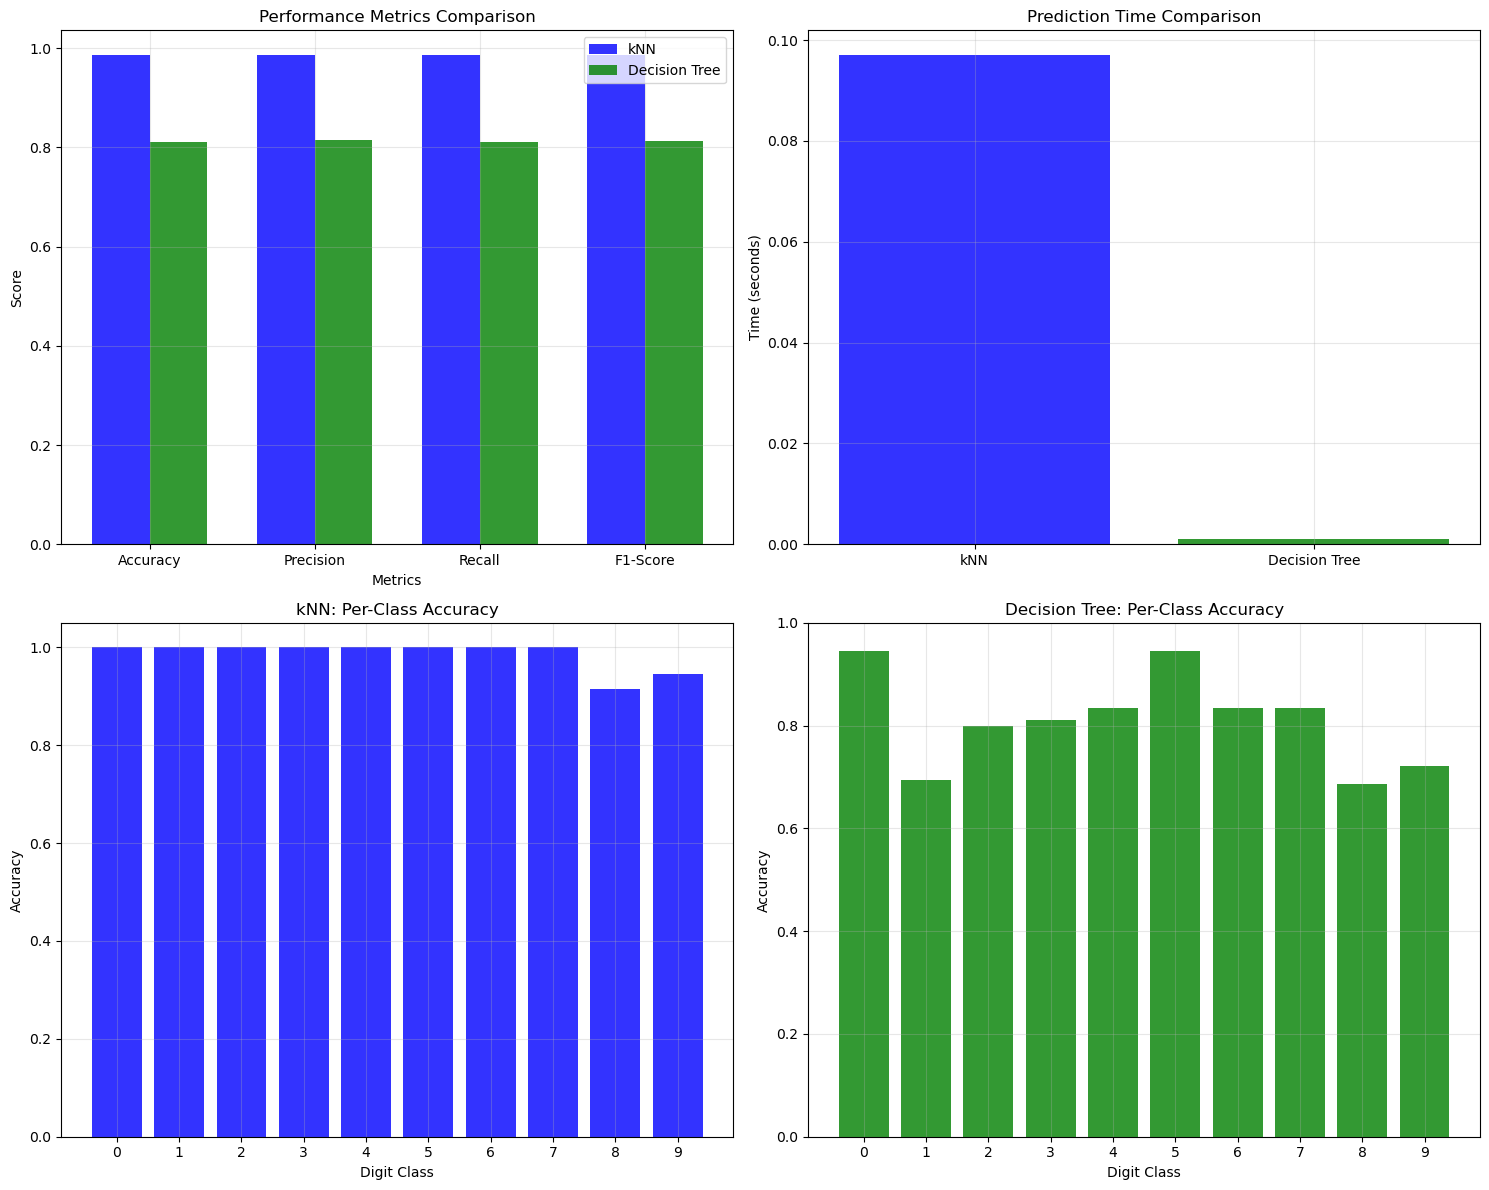

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Evaluation metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]

x = np.arange(len(metrics))
width = 0.35

axes[0,0].bar(x - width/2, knn_scores, width, label='kNN', alpha=0.8, color='blue')
axes[0,0].bar(x + width/2, dt_scores, width, label='Decision Tree', alpha=0.8, color='green')
axes[0,0].set_xlabel('Metrics')
axes[0,0].set_ylabel('Score')
axes[0,0].set_title('Performance Metrics Comparison')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(metrics)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Prediction time comparison
algorithms = ['kNN', 'Decision Tree']
times = [knn_prediction_time, dt_prediction_time]
colors = ['blue', 'green']

axes[0,1].bar(algorithms, times, color=colors, alpha=0.8)
axes[0,1].set_ylabel('Time (seconds)')
axes[0,1].set_title('Prediction Time Comparison')
axes[0,1].grid(True, alpha=0.3)

# Per-class accuracy for kNN
knn_per_class_acc = []
for digit in range(10):
    mask = y_test_final == digit
    if np.sum(mask) > 0:
        digit_acc = np.mean(knn_test_predictions[mask] == y_test_final[mask])
        knn_per_class_acc.append(digit_acc)
    else:
        knn_per_class_acc.append(0)

axes[1,0].bar(range(10), knn_per_class_acc, alpha=0.8, color='blue')
axes[1,0].set_xlabel('Digit Class')
axes[1,0].set_ylabel('Accuracy')
axes[1,0].set_title('kNN: Per-Class Accuracy')
axes[1,0].set_xticks(range(10))
axes[1,0].grid(True, alpha=0.3)

# Per-class accuracy for Decision Tree
dt_per_class_acc = []
for digit in range(10):
    mask = y_test_final == digit
    if np.sum(mask) > 0:
        digit_acc = np.mean(dt_test_predictions[mask] == y_test_final[mask])
        dt_per_class_acc.append(digit_acc)
    else:
        dt_per_class_acc.append(0)

axes[1,1].bar(range(10), dt_per_class_acc, alpha=0.8, color='green')
axes[1,1].set_xlabel('Digit Class')
axes[1,1].set_ylabel('Accuracy')
axes[1,1].set_title('Decision Tree: Per-Class Accuracy')
axes[1,1].set_xticks(range(10))
axes[1,1].set_ylim(0, 1.0)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Common misclassifications

In [23]:
# Look at confusion matrices to identify common misclassifications
def analyze_confusion_matrix(cm, algorithm_name):
    # Find most confused pairs (excluding diagonal)
    confusion_pairs = []
    for i in range(10):
        for j in range(10):
            if i != j and cm[i, j] > 0:
                confusion_pairs.append((i, j, cm[i, j]))
    
    # Sort by frequency of confusion
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    
    print(f"Top 5 confusion patterns:")
    for i, (actual, predicted, count) in enumerate(confusion_pairs[:5]):
        if count > 0:
            print(f"  {i+1}. Actual {actual} → Predicted {predicted}: {count} times")
    
    # Calculate per-class error rates
    print(f"\nPer-class error analysis:")
    for digit in range(10):
        total_actual = np.sum(cm[digit, :])
        correct = cm[digit, digit]
        if total_actual > 0:
            error_rate = (total_actual - correct) / total_actual
            print(f"  Digit {digit}: {error_rate:.3f} error rate ({total_actual - correct}/{total_actual} wrong)")
    
    return confusion_pairs

# Analyze both algorithms
print(f"\n-----kNN Error Analysis-----")
knn_confusion_pairs = analyze_confusion_matrix(knn_cm, "kNN")
print(f"\n-----DT Error Analysis-----")
dt_confusion_pairs = analyze_confusion_matrix(dt_cm, "Decision Tree")


-----kNN Error Analysis-----
Top 5 confusion patterns:
  1. Actual 8 → Predicted 1: 3 times
  2. Actual 9 → Predicted 4: 1 times
  3. Actual 9 → Predicted 8: 1 times

Per-class error analysis:
  Digit 0: 0.000 error rate (0/36 wrong)
  Digit 1: 0.000 error rate (0/36 wrong)
  Digit 2: 0.000 error rate (0/35 wrong)
  Digit 3: 0.000 error rate (0/37 wrong)
  Digit 4: 0.000 error rate (0/36 wrong)
  Digit 5: 0.000 error rate (0/37 wrong)
  Digit 6: 0.000 error rate (0/36 wrong)
  Digit 7: 0.000 error rate (0/36 wrong)
  Digit 8: 0.086 error rate (3/35 wrong)
  Digit 9: 0.056 error rate (2/36 wrong)

-----DT Error Analysis-----
Top 5 confusion patterns:
  1. Actual 8 → Predicted 1: 7 times
  2. Actual 1 → Predicted 8: 4 times
  3. Actual 9 → Predicted 8: 4 times
  4. Actual 3 → Predicted 9: 3 times
  5. Actual 6 → Predicted 5: 3 times

Per-class error analysis:
  Digit 0: 0.056 error rate (2/36 wrong)
  Digit 1: 0.306 error rate (11/36 wrong)
  Digit 2: 0.200 error rate (7/35 wrong)
  Dig

## Feature importance (Decision Trees)

Total features: 64
Features with non-zero importance: 43

Feature Importance Statistics:
Mean importance: 0.0156
Max importance:  0.0959
Unused features: 21


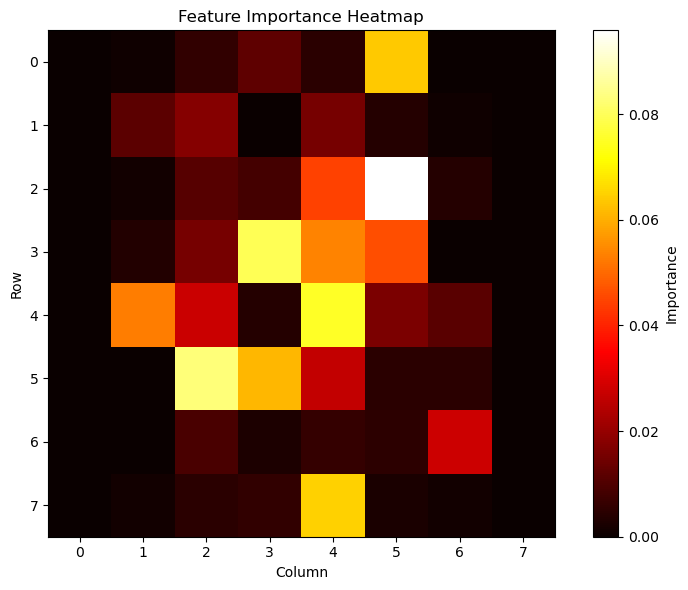

In [24]:
# Feature Importance (Decision Trees)

# Extract feature importance from the trained Decision Tree
feature_importances = final_dt_model.feature_importances_
print(f"Total features: {len(feature_importances)}")
print(f"Features with non-zero importance: {np.sum(feature_importances > 0)}")

# Basic statistics
print(f"\nFeature Importance Statistics:")
print(f"Mean importance: {np.mean(feature_importances):.4f}")
print(f"Max importance:  {np.max(feature_importances):.4f}")
print(f"Unused features: {np.sum(feature_importances == 0)}")

# Visualize feature importance as heatmap (8x8 grid)
plt.figure(figsize=(8, 6))

# Use heatmap to visualise which pixels are more important based on brightness
# Feature importance as 8x8 heatmap
importance_2d = feature_importances.reshape(8, 8)
plt.imshow(importance_2d, cmap='hot', interpolation='nearest')
plt.title('Feature Importance Heatmap')
plt.xlabel('Column')
plt.ylabel('Row')
plt.colorbar(label='Importance')

plt.tight_layout()
plt.show()